# Vacunación del COVID-19 a nivel mundial

En esta práctica vamos a realizar un Análisis Exploratorio de Datos sobre el progreso de la vacunación del COVID. Los datos los hemos obtenido del repositorio de [Kaggle](https://www.kaggle.com/gpreda/covid-world-vaccination-progress) a cargo de Gabriel Preda que ha realizado el preprocesado de los datos de [Our World in Data](https://ourworldindata.org) obteniendo 2 archivos csv: `country_vaccinations.csv` y `country_vaccinations_by_manufacturer.csv`.

Los datos disponibles para esta práctica corresponden a la versión 121 de junio de 2021. Puede descargarse los datos actualizados del repositorio de Kaggle a fecha de hoy (deberá registrarse) y reemplazarlos por los que tiene disponibles en la carpeta `_data` correspondiente a esta práctica.

Para obtener los resultados, vamos a utilizar distintas librerías. La primera es la librería `pacman`(http://trinker.github.io/pacman_dev/).

In [1]:
# Para instalar la librería pacman ejecute este bloque de código
# Si la tiene ya instalada, no es necesario que lo ejecute
install.packages("pacman")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
# Cargamos la librería pacman (con tidyverse y lubridate)
pacman::p_load(tidyverse, lubridate)

In [3]:
# Cargamos los datos
country_vaccinations <- read_csv("_data/country_vaccinations.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  country = col_character(),
  iso_code = col_character(),
  date = col_date(format = ""),
  total_vaccinations = col_double(),
  people_vaccinated = col_double(),
  people_fully_vaccinated = col_double(),
  daily_vaccinations_raw = col_double(),
  daily_vaccinations = col_double(),
  total_vaccinations_per_hundred = col_double(),
  people_vaccinated_per_hundred = col_double(),
  people_fully_vaccinated_per_hundred = col_double(),
  daily_vaccinations_per_million = col_double(),
  vaccines = col_character(),
  source_name = col_character(),
  source_website = col_character()
)




In [4]:
# Vamos las primeras filas de datos
head(country_vaccinations)

country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Afghanistan,AFG,2021-02-22,0,0,NA,NA,NA,0,0,NA,NA,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing",World Health Organization,https://covid19.who.int/
Afghanistan,AFG,2021-02-23,NA,NA,NA,NA,1367,NA,NA,NA,35,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing",World Health Organization,https://covid19.who.int/
Afghanistan,AFG,2021-02-24,NA,NA,NA,NA,1367,NA,NA,NA,35,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing",World Health Organization,https://covid19.who.int/
Afghanistan,AFG,2021-02-25,NA,NA,NA,NA,1367,NA,NA,NA,35,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing",World Health Organization,https://covid19.who.int/
Afghanistan,AFG,2021-02-26,NA,NA,NA,NA,1367,NA,NA,NA,35,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing",World Health Organization,https://covid19.who.int/
Afghanistan,AFG,2021-02-27,NA,NA,NA,NA,1367,NA,NA,NA,35,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing",World Health Organization,https://covid19.who.int/


Podemos observar valores NA debidos a la falta de información en ciertos países. Procedemos a eliminarlos directamente con la función `na.omit` y almacenar el resultado con el nombre de `vac_nona`.

In [5]:
vac_nona <- na.omit(country_vaccinations)
head(vac_nona)

country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Afghanistan,AFG,2021-05-27,593313,479574,113739,2859,6487,1.52,1.23,0.29,167,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing",World Health Organization,https://covid19.who.int/
Albania,ALB,2021-02-18,3049,2438,611,1348,254,0.11,0.08,0.02,88,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid-kryhen-776461-vaksinime/
Albania,ALB,2021-05-11,622507,440921,181586,9548,12160,21.63,15.32,6.31,4225,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid-kryhen-776461-vaksinime/
Albania,ALB,2021-05-12,632676,444755,187921,10169,10870,21.98,15.45,6.53,3777,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid-kryhen-776461-vaksinime/
Albania,ALB,2021-05-13,638338,445402,192936,5662,9445,22.18,15.48,6.70,3282,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid-kryhen-776461-vaksinime/
Albania,ALB,2021-05-14,653330,448571,204759,14992,9662,22.70,15.59,7.12,3357,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid-kryhen-776461-vaksinime/


Finalmente, podemos ver la última fecha en la que hay datos disponibles en nuestro archivo csv.

In [6]:
# Máximo de la variable date (formato año-mes-día)
max(vac_nona$date)

[1] "2021-05-31"

#### Países con más vacunas suministradas
Comenzamos el análisis exploratorio viendo qué países tienen más vacunas suministradas.

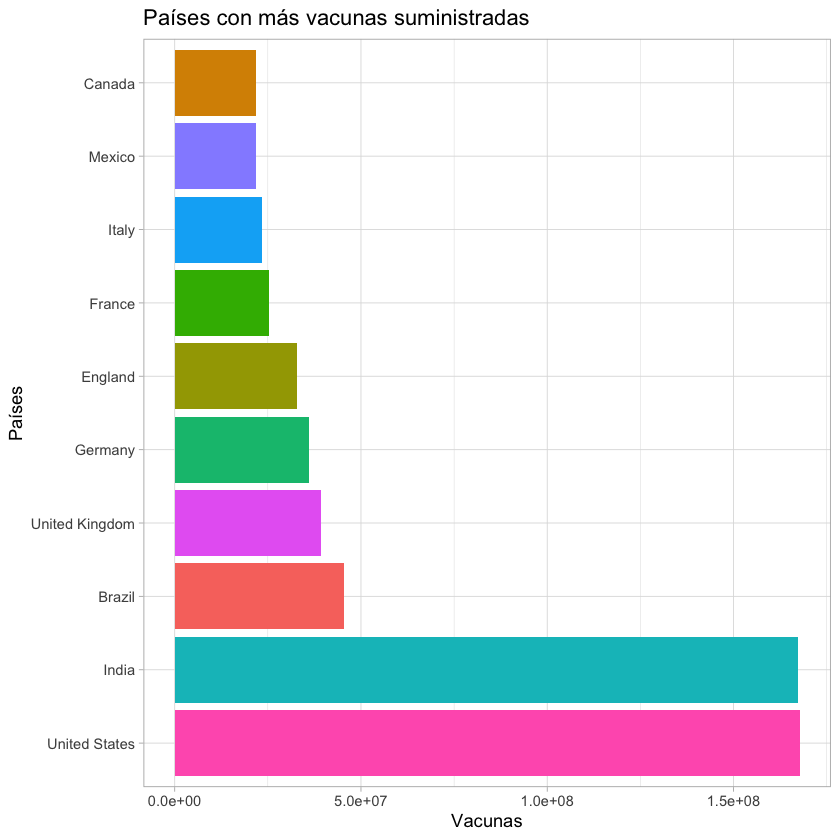

In [7]:
# Seleccionamos los países con más vacunas suministradas (mas_vacunados)
mas_vacunados <- vac_nona %>% filter(!is.na(people_vaccinated)) %>%  
                        select(country,date,people_vaccinated) %>% 
                        arrange(desc(people_vaccinated)) %>% 
                        distinct(country,`.keep_all` = TRUE)

# Generamos un gráfico de barras con ggplot2 para los 10 primeros (head(10))
mayor_vacuna<-mas_vacunados %>% arrange(desc(people_vaccinated) ) %>% head(10) %>%
    ggplot()+
        geom_col(mapping = aes(x = reorder(country,desc(people_vaccinated)),y =people_vaccinated, fill=country ), show.legend = FALSE)+
                    coord_flip()+
                theme_light()+
                    ggtitle(label = "Países con más vacunas suministradas")+
                        xlab(label = "Países")+
                        ylab(label = "Vacunas")
# Obtenemos el gráfico                 
mayor_vacuna

#### Porcentaje de población totalmente vacunada
Vamos a representar gráficamente los países con más porcentaje de población totalmente vacunada, dato correspondiente a la variable `people_fully_vaccinated_per_hundred`.

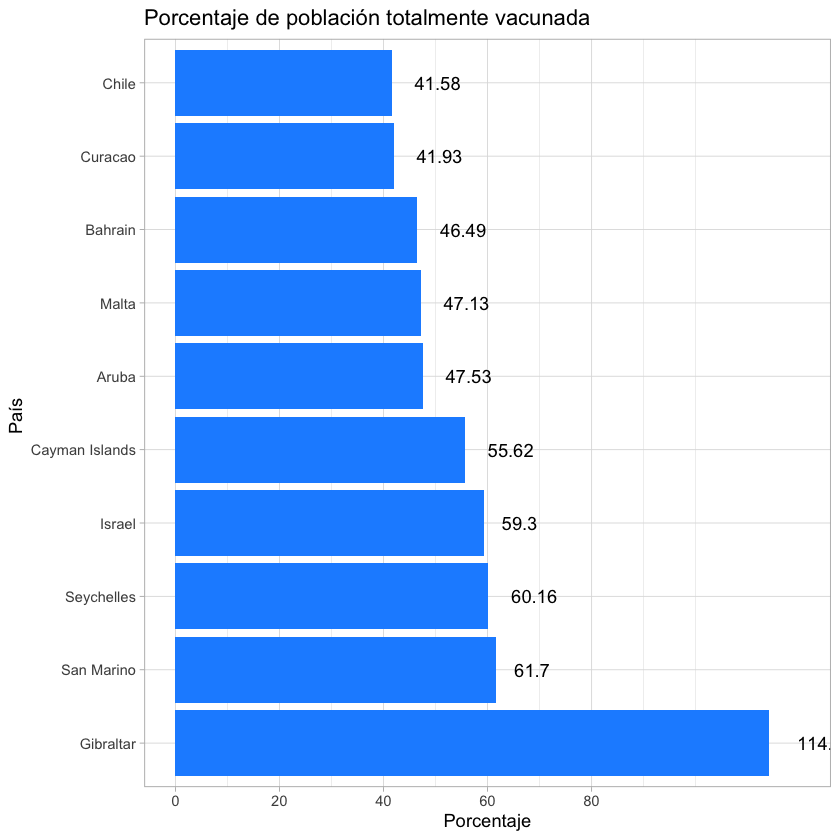

In [8]:
# Seleccionamos y ordenamos los datos de población totalmente vacunada 
por_porcentaje <- vac_nona %>% 
                filter(!is.na(people_fully_vaccinated_per_hundred)) %>% 
                select(country,date,people_fully_vaccinated_per_hundred) %>% 
                arrange(desc(people_fully_vaccinated_per_hundred)) %>% 
                distinct(country,`.keep_all` = TRUE)
# Generamos un gráfico de barras con ggplot2 para los 10 primeros (head(10))
mayor_porcentaje <- por_porcentaje %>% 
                arrange(desc(people_fully_vaccinated_per_hundred)) %>% 
                head(10) %>%
    ggplot()+
        geom_col(mapping = aes(x= reorder(country,desc(people_fully_vaccinated_per_hundred)),y = people_fully_vaccinated_per_hundred),fill="#1E90FF")+
                    coord_flip()+
                        theme_light()+
                            ggtitle(label = "Porcentaje de población totalmente vacunada")+
                                geom_text(aes(x = country,y =people_fully_vaccinated_per_hundred,label=people_fully_vaccinated_per_hundred ),hjust=-0.5)+
                                xlab(label = "País ")+
                                ylab(label = "Porcentaje")+
                                scale_y_continuous(limits = c(0,120),breaks = c(0,20,40,60,80))
# Obtenemos el gráfico 
mayor_porcentaje


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




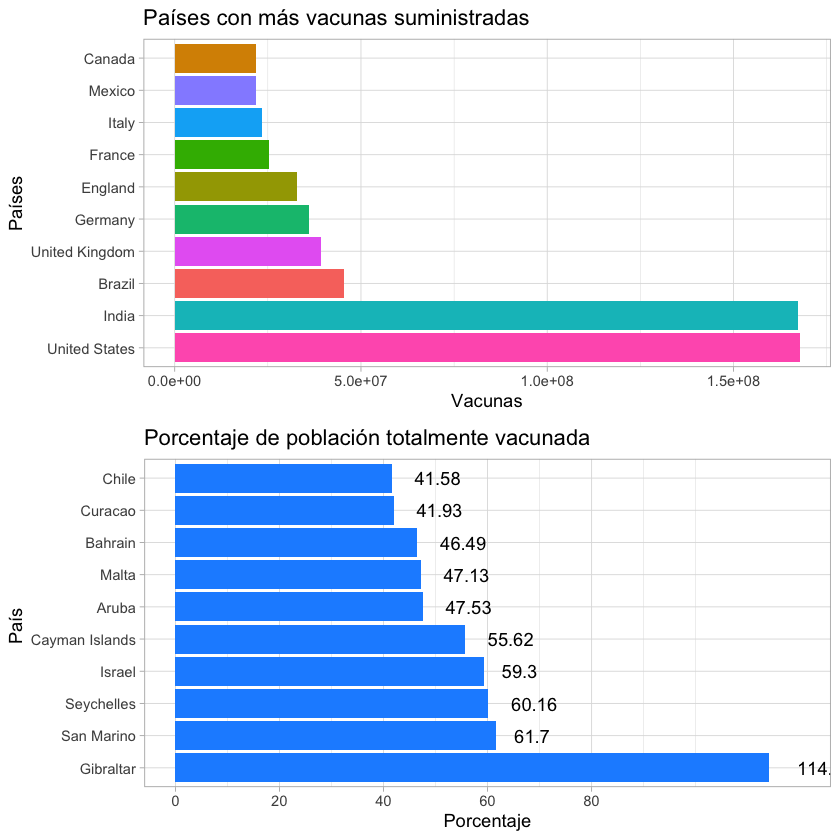

In [9]:
# Las 2 gráficas juntas (usando la librería gridExtra)
library(gridExtra)

grid.arrange(mayor_vacuna ,mayor_porcentaje)

#### ¿Qué vacunas tiene cada país?
Vamos a obtener un listado con las vacunas disponibles en cada país.

In [10]:
# Vacunas por país
vac_nona %>% group_by(country,vaccines) %>% distinct(country,vaccines)

country,vaccines
<chr>,<chr>
Afghanistan,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing"
Albania,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V"
Andorra,"Oxford/AstraZeneca, Pfizer/BioNTech"
Antigua and Barbuda,Oxford/AstraZeneca
Argentina,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V"
Aruba,Pfizer/BioNTech
Australia,"Oxford/AstraZeneca, Pfizer/BioNTech"
Austria,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Azerbaijan,"Oxford/AstraZeneca, Sinovac, Sputnik V"


Podemos ver las vacunas de un país concreto, por ejemplo España (Spain), con el siguiente código. Puede cambiar el nombre del país para obtener la información de dicho país.

In [11]:
vac_nona %>% group_by(country,vaccines) %>% 
distinct(country,vaccines) %>% 
filter(country == "Spain")

country,vaccines
<chr>,<chr>
Spain,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"


Podemos ver gráficamente el número de vacunas disponibles por país indicando las disponibles en España en el gráfico.

Warning message:
“It is deprecated to specify `guide = FALSE` to remove a guide. Please use `guide = "none"` instead.”


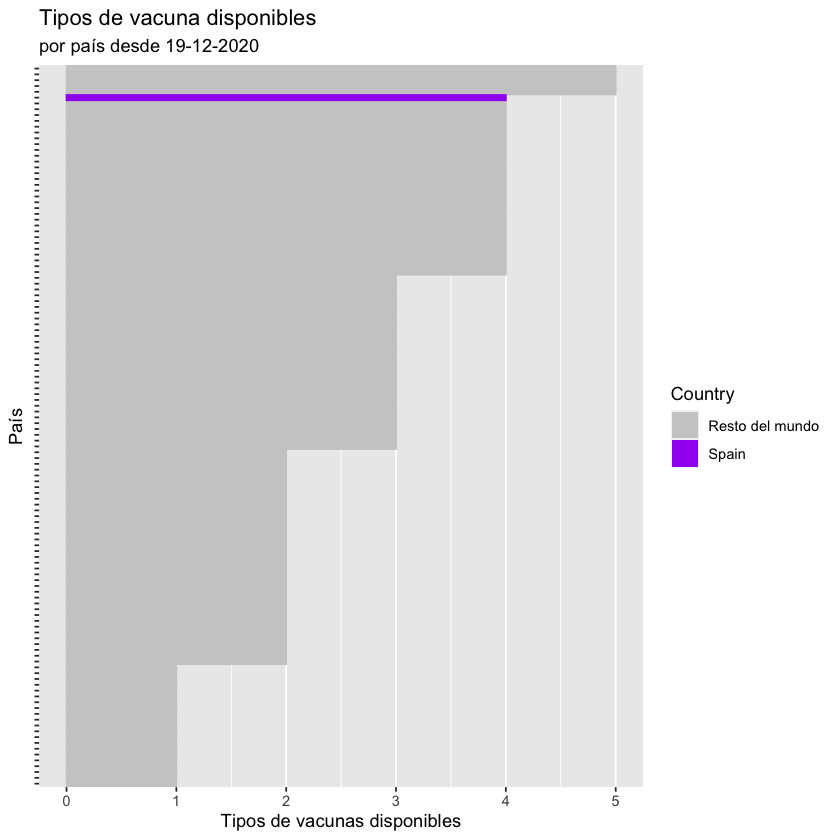

In [12]:
# Contamos el número de vacunas disponibles
vac_nona$number_of_vac <- str_count(vac_nona$vaccines, ",")+1
# Filtramos datos desde el 18 de diciembre de 2020
vacx <- vac_nona %>%
  filter(as.Date(date) > "2020-12-18") %>%
  group_by(country, number_of_vac) %>%
  summarise(avg = mean(number_of_vac), .groups = 'drop') %>%
  filter(avg>0)
# Seleccionamos los datos de España
vacx$spain <- ifelse(vacx$country=="Spain","Spain", "Resto del mundo")
# Generamos el gráfico
ggplot(vacx, aes(reorder(country, +avg), avg, fill = spain, colour = spain))+
  geom_bar(stat = "identity",  width = 0.9)+
  scale_fill_manual(values = c("gray80", "purple"))+
  scale_colour_manual(values = c("gray80", "purple"), guide = F)+
  coord_flip()+
  labs(y = "Tipos de vacunas disponibles", x = "País", title = "Tipos de vacuna disponibles", fill = "Country", 
       subtitle = "por país desde 19-12-2020")+
  theme(legend.position = "right", legend.direction = "vertical", axis.text.y = element_text(size = 0),
        panel.grid.major.y = element_blank())

### Evolución de la vacunación
Vamos a ver gráficamente la evolución de la vacunación en una escala temporal. Para ello comenzamos utilizando la variable `daily_vaccinations_per_million`. Vamos a distinguir en el gráfico los datos de España.

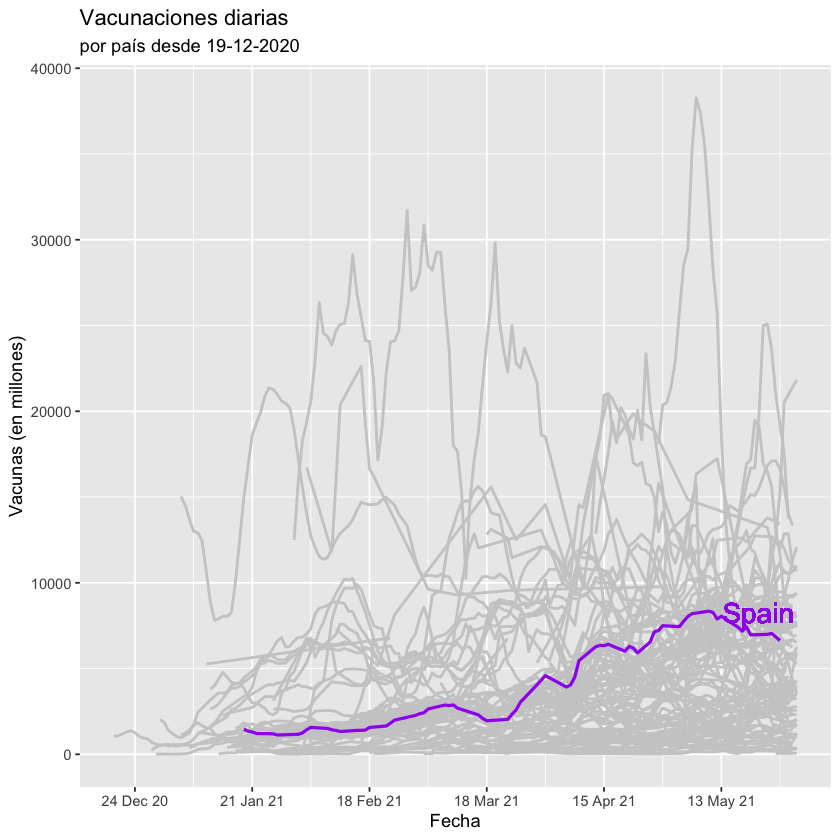

In [13]:
# Seleccionamos los datos a partir del 18 de diciembre de 2020
full1 <- vac_nona %>%
  group_by(date, country) %>%
  filter(as.Date(date) > "2020-12-18")
# Datos de España
spa1 <- vac_nona %>%
  group_by(date, country) %>%
  filter(country == "Spain") %>%
  filter(as.Date(date) > "2020-12-18")

# Generamos el gráfico
ggplot()+
  geom_line(data = full1, aes(date, daily_vaccinations_per_million, group = country), size = 0.8, colour = "gray80")+
  geom_line(data = spa1, aes(date, daily_vaccinations_per_million), size = 0.9, colour = "purple")+
geom_text(data = spa1, aes(x = max(spa1$date), y = spa1$daily_vaccinations_per_million[spa1$date==max(spa1$date)], 
                              label = country), hjust = 0.8, vjust = -0.9, size = 5.9, color = "purple")+
  scale_x_date(date_labels = "%d %b %y", date_breaks = "28 days")+
  labs(x = "Fecha", y = "Vacunas (en millones)", title = "Vacunaciones diarias", subtitle = "por país desde 19-12-2020")

Representamos ahora la evolución del porcentaje de personas totalmente vacunadas, variable `people_fully_vaccinated_per_hundred`.

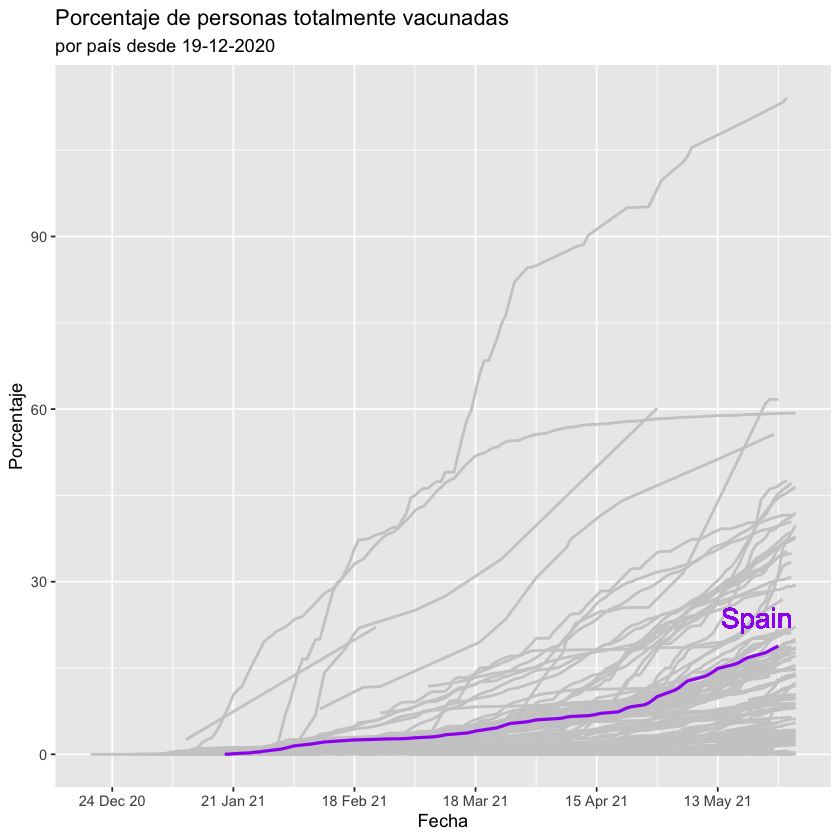

In [14]:
# Generamos el gráfico
ggplot()+
  geom_line(data = full1, aes(date, people_fully_vaccinated_per_hundred, group = country), size = 0.8, colour = "gray80")+
  geom_line(data = spa1, aes(date, people_fully_vaccinated_per_hundred), size = 0.9, colour = "purple")+
geom_text(data = spa1, aes(x = max(spa1$date), y = spa1$people_fully_vaccinated_per_hundred[spa1$date==max(spa1$date)], 
                              label = country), hjust = 0.8, vjust = -0.9, size = 5.9, color = "purple")+
  scale_x_date(date_labels = "%d %b %y", date_breaks = "28 days")+
  labs(x = "Fecha", y = "Porcentaje", title = "Porcentaje de personas totalmente vacunadas", subtitle = "por país desde 19-12-2020")

También podemos obtener el gráfico de personas vacunadas (con al menos una dosis) usando la variable `people_vaccinated`.

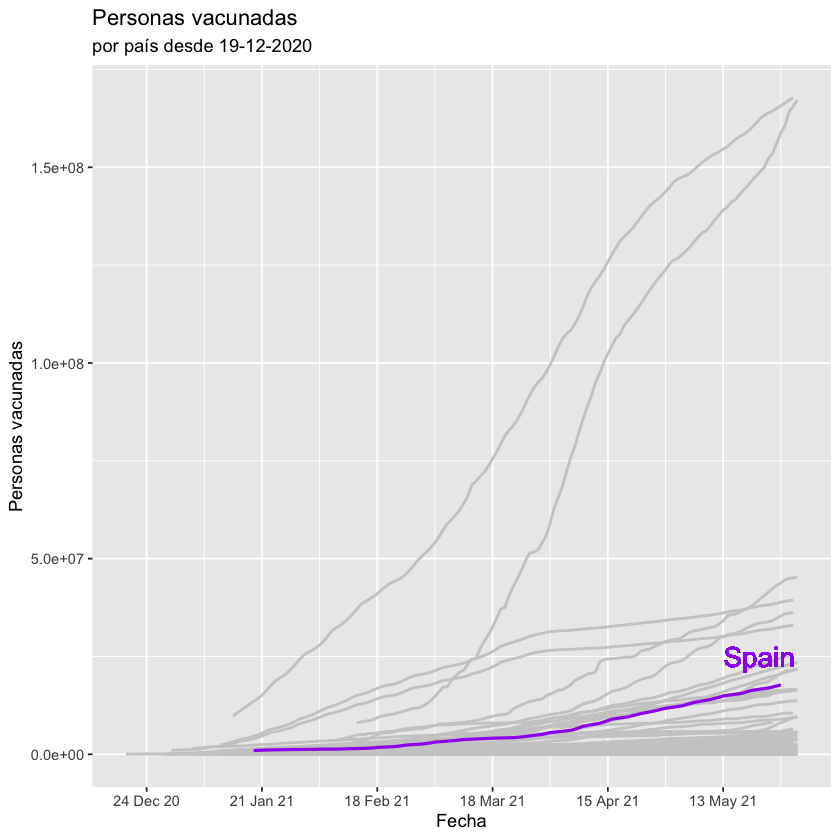

In [15]:
# Generamos el gráfico
ggplot()+
  geom_line(data = full1, aes(date, people_vaccinated, group = country), size = 0.8, colour = "gray80")+
  geom_line(data = spa1, aes(date, people_vaccinated), size = 0.9, colour = "purple")+
geom_text(data = spa1, aes(x = max(spa1$date), y = spa1$people_vaccinated[spa1$date==max(spa1$date)], 
                              label = country), hjust = 0.8, vjust = -0.9, size = 5.9, color = "purple")+
  scale_x_date(date_labels = "%d %b %y", date_breaks = "28 days")+
  labs(x = "Fecha", y = "Personas vacunadas", title = "Personas vacunadas", subtitle = "por país desde 19-12-2020") 

Evidentemente, aparecen los datos de muchos países. Por clarificar y comprender mejor los gráficos y realizar comparaciones, vamos a seleccionar 8 (podría ser otro número) y representar gráficamente algunos datos de vacunación.

In [16]:
# Seleccionamos 8 países
data2 <- vac_nona %>%
  filter(country %in% c("Germany", "United Kingdom", 
                        "United States", "Canada", "India", 
                        "Israel", "Chile", "Spain"))
head(data2)

country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,number_of_vac
<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
Canada,CAN,2021-01-06,183360,182930,430,28163,14174,0.49,0.48,0.00,376,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracker.ca,https://covid19tracker.ca/vaccinationtracker.html,3
Canada,CAN,2021-01-07,219446,218359,1087,36086,17409,0.58,0.58,0.00,461,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracker.ca,https://covid19tracker.ca/vaccinationtracker.html,3
Canada,CAN,2021-01-08,260654,258627,2027,41208,22409,0.69,0.69,0.01,594,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracker.ca,https://covid19tracker.ca/vaccinationtracker.html,3
Canada,CAN,2021-01-09,296241,293301,2940,35587,26787,0.78,0.78,0.01,710,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracker.ca,https://covid19tracker.ca/vaccinationtracker.html,3
Canada,CAN,2021-01-10,319603,316661,2942,23362,29367,0.85,0.84,0.01,778,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracker.ca,https://covid19tracker.ca/vaccinationtracker.html,3
Canada,CAN,2021-01-11,359049,356107,2942,39446,31616,0.95,0.94,0.01,838,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Official data from provinces via covid19tracker.ca,https://covid19tracker.ca/vaccinationtracker.html,3


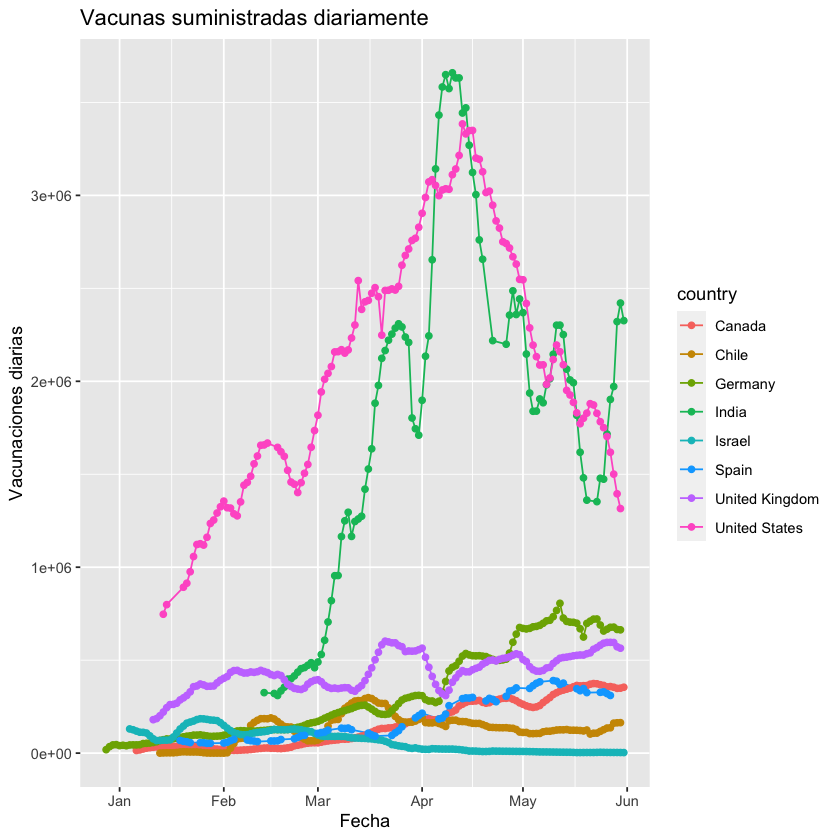

In [17]:
# Generamos el gráfico con la variable daily_vaccinations
plot1 <- ggplot(data2, aes(x=date, y=daily_vaccinations, group=country)) +
  geom_line(aes(color=country))+
  geom_point(aes(color=country)) +
  ggtitle("Vacunas suministradas diariamente")+
  xlab("Fecha")+
  ylab("Vacunaciones diarias") 
# Representamos el gráfico
plot1

Siguiendo con estos 8 países, vamos a obtener una tabla con los últimos datos disponibles sobre el progreso en la vacunación. Utilizamos la variable `total_vaccinations_per_hundred`. Para la última fecha disponible, usamos el máximo de la variable `date`. Puede ocurrir (y ocurre) que no haya datos disponible de un país a esa fecha. 

In [18]:
# Últimos datos de la variable total_vaccinations_per_hundred
data3 <- vac_nona %>%
  select(country, date, total_vaccinations_per_hundred) %>%
  filter(country %in% c("Canada", "Germany", "United Kingdom", "United States", "Israel", "Spain", "Chile", "India")) %>%
  filter(date == max(vac_nona$date))
head(data3)

country,date,total_vaccinations_per_hundred
<chr>,<date>,<dbl>
Canada,2021-05-31,63.22
India,2021-05-31,15.25
Israel,2021-05-31,122.27


Se pueden obtener datos correspondientes a una fecha 10 días anterior a la última disponible sin más que restar 10.

In [19]:
data3 <- vac_nona %>%
  select(country, date, total_vaccinations_per_hundred) %>%
  filter(country %in% c("Canada", "Germany", "United Kingdom", "United States", "Israel", "Spain", "Chile", "India")) %>%
  filter(date == max(vac_nona$date)-20)
head(data3)

country,date,total_vaccinations_per_hundred
<chr>,<date>,<dbl>
Canada,2021-05-11,43.87
Chile,2021-05-11,84.09
Germany,2021-05-11,44.15
India,2021-05-11,12.60
Israel,2021-05-11,121.48
Spain,2021-05-11,44.11


### Datos y mapas
Una opción muy interesante que nos ofrece R es la posibilidad de visualizar los datos disponibles en un mapa. Recordamos que nuestro dataset tenía 2 variables (`country` e `ìso_code`) que permiten localizar el país al que corresponden los datos. Veamos el mapa con el porcentaje de personas vacunadas (al menos una dosis) en Europa.

In [20]:
# Cargamos la librería ggrepel para obtener el gráfico
library(ggrepel)

Warning message:
“Removed 20 rows containing missing values (geom_point).”


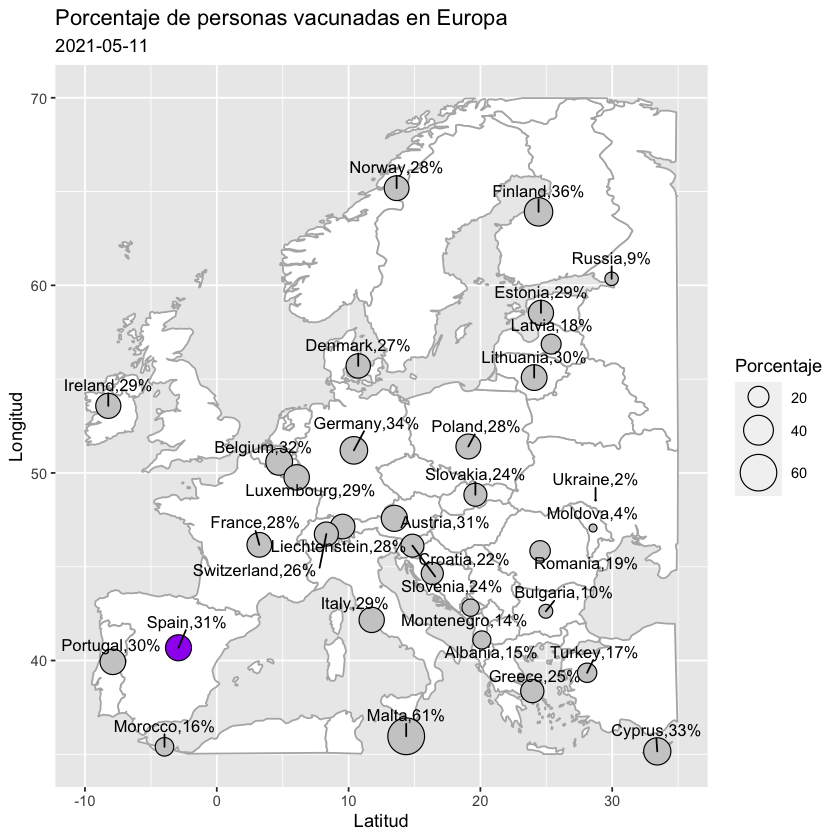

In [21]:
# Definimos la última fecha disponible menos 20 días
ult_fecha <- max(vac_nona$date)-20
# Cargamos el mapa y definimos los extremos (latitud y longitud)
world_map <- map_data("world") %>%
  filter(between(lat, 35, 70)) %>%
  filter(between(long, -10, 35))
# Seleccionamos los datos
country <- vac_nona %>%
  filter(date == max(vac_nona$date)-20)%>%
  group_by(country) %>%
  select(country, people_vaccinated_per_hundred)
# Nombres de los países para etiquetar el mapa
names(country)[1] <- "region"

world_map <- world_map %>%
  left_join(country, by = "region")
# Incluimos los datos en el mapa
world_map2 <- world_map %>%
  select(long, lat, region, people_vaccinated_per_hundred) %>%
  group_by(region) %>%
  summarise(long = mean(long), lat = mean(lat), people_vaccinated_per_hundred = mean(people_vaccinated_per_hundred), 
            .groups = 'drop')
# Datos de España en morado
world_map2$spain <- ifelse(world_map2$region=="Spain","purple", "gray80")
# Generamos el gráfico
ggplot()+
  geom_polygon(data = world_map, aes(x = long, y = lat, group = group), fill = "white", colour = "gray70")+
  geom_point(data = world_map2, aes(x = long, y = lat, size = people_vaccinated_per_hundred),
             shape = 21, fill = world_map2$spain)+
  geom_text_repel(data = world_map2[is.na(world_map2$people_vaccinated_per_hundred)==F,],
            aes(x = long, y = lat, label = paste0(region, ",", round(people_vaccinated_per_hundred,0), "%")),
            size = 3.5, hjust = 0.5, vjust = -1.3)+
  scale_size(range = c(0, 10))+
  scale_fill_manual(values = c("purple", "gray80"))+
  labs(x = "Latitud", y = "Longitud", 
       title = "Porcentaje de personas vacunadas en Europa",
       size = "Porcentaje", subtitle = ult_fecha)+
  theme(legend.position = "right", legend.direction = "vertical")

# Vacunación en España por Comunidades Autónomas
Vamos a terminar esta práctica obteniendo 4 gráficos informativos sobre la vacunación en Castilla y León. Cambiando el nombre de la variable ` autonomia` en el código que sigue, puede obtener esos mismos gráficos para cualquier otra Comunidad Autónoma.

Los datos que vamos a utilizar provienen del proyecto [Escovid19data de Github](https://github.com/montera34/escovid19data) donde diariamente se procesan colaborativamente datos de COVID-19 por provincias en España. 

In [22]:
# Definimos la comunidad autónoma
autonomia = "Castilla y Leon"

In [23]:
# Cargamos librería para los colores de los gráficos
library(RColorBrewer)

# Definimos una paleta de 9 colores de rojo para los gráficos
# Puede definnir la paleta para otro color, verde por ejemplo
# paleta_cyl <- brewer.pal(n = 9, name = "Greens")
paleta_cyl <- brewer.pal(n = 9, name = "Reds")

color_ccaa = paleta_cyl

In [24]:
# Definimos las URL de descarga de los datos
url_file_vacunas<- "https://raw.githubusercontent.com/montera34/escovid19data/master/data/original/vacunas/estado_vacunacion_.csv"
url_ccaas_poblacion <- "https://raw.githubusercontent.com/montera34/escovid19data/master/data/original/provincias-poblacion.csv"

In [25]:
# Creamos un dataframe con los nombres de las Comunidades Autónomas
# en base al INE (Instituto Nacional de Estadística) y
# para nuestros gráficos
ccaa_INE <- c("01 Andalucía","02 Aragón","03 Asturias, Principado de","04 Balears, Illes","05 Canarias",
              "06 Cantabria","07 Castilla y León","08 Castilla - La Mancha","09 Cataluña",
              "10 Comunitat Valenciana","11 Extremadura","12 Galicia","13 Madrid, Comunidad de",
              "14 Murcia, Región de","15 Navarra, Comunidad Foral de","16 País Vasco",
              "17 Rioja, La", "18 Ceuta", "19 Melilla")
ccaa <-     c("Andalucía", "Aragón", "Asturias", "Baleares", "Canarias" ,         
              "Cantabria", "Castilla y Leon", "Castilla La Mancha","Cataluña",
              "C. Valenciana","Extremadura", "Galicia", "Madrid",
              "Murcia","Navarra","País Vasco",
              "La Rioja","Ceuta","Melilla") 

ccaa_names <- data_frame(ccaa_INE=ccaa_INE,
                         ccaa=ccaa )
print (ccaa_names)

Warning message:
“`data_frame()` was deprecated in tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


# A tibble: 19 x 2
   ccaa_INE                       ccaa              
   <chr>                          <chr>             
 1 01 Andalucía                   Andalucía         
 2 02 Aragón                      Aragón            
 3 03 Asturias, Principado de     Asturias          
 4 04 Balears, Illes              Baleares          
 5 05 Canarias                    Canarias          
 6 06 Cantabria                   Cantabria         
 7 07 Castilla y León             Castilla y Leon   
 8 08 Castilla - La Mancha        Castilla La Mancha
 9 09 Cataluña                    Cataluña          
10 10 Comunitat Valenciana        C. Valenciana     
11 11 Extremadura                 Extremadura       
12 12 Galicia                     Galicia           
13 13 Madrid, Comunidad de        Madrid            
14 14 Murcia, Región de           Murcia            
15 15 Navarra, Comunidad Foral de Navarra           
16 16 País Vasco                  País Vasco        
17 17 Rioja, La            

In [26]:
# Cargamos los datos de población de la web del INE
# y los unimos al dataframe con los nombres de las CCAA
autonomias_poblacion <- read_csv2( "https://www.ine.es/jaxiT3/files/t/es/csv_bdsc/2853.csv?nocab=1") %>% 
                        rename (c("ccaa_INE"="Comunidades y Ciudades Autónomas" )) %>% 
                        rename (c("poblacion"="Total" )) %>% 
                        filter (Periodo == "2020" &
                                Sexo == "Total" &
                                ccaa_INE != "Total")  %>%
                        select ("ccaa_INE","poblacion") %>%
                        right_join (ccaa_names)
head(autonomias_poblacion)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.


── Column specification ────────────────────────────────────────────────────────
cols(
  `Comunidades y Ciudades Autónomas` = col_character(),
  Sexo = col_character(),
  Periodo = col_double(),
  Total = col_number()
)


Joining, by = "ccaa_INE"



ccaa_INE,poblacion,ccaa
<chr>,<dbl>,<chr>
01 Andalucía,8464411,Andalucía
02 Aragón,1329391,Aragón
"03 Asturias, Principado de",1018784,Asturias
"04 Balears, Illes",1171543,Baleares
05 Canarias,2175952,Canarias
06 Cantabria,582905,Cantabria


In [27]:
# Cargamos los datos de vacunación
vacunas <- read_csv( url_file_vacunas )
# Sustituimos los NA por 0
vacunas <- vacunas %>% 
          mutate_if(is.numeric, replace_na, 0) 
# Añadimos los nombres de las CCAA
vacunas <-left_join ( vacunas,autonomias_poblacion, by = "ccaa" )
# Establecemos el formato de fecha
vacunas$date_pub <-  as.Date(vacunas$date_pub,format= "%d/%m/%y")
# Seleccionamos los datos de la autonomia
vacunas <- filter (vacunas, ccaa == autonomia)
# Vemos el resultado
head(vacunas)


── Column specification ────────────────────────────────────────────────────────
cols(
  date_pub = col_character(),
  ccaa = col_character(),
  `Dosis entregadas Pfizer` = col_double(),
  `Dosis entregadas Moderna` = col_double(),
  `Dosis entregadas AstraZeneca` = col_double(),
  `Dosis entregadas Janssen` = col_logical(),
  `Dosis entregadas` = col_double(),
  `Dosis administradas` = col_double(),
  `% sobre entregadas` = col_double(),
  `Total 1 vacuna` = col_logical(),
  `Total pauta completada` = col_double(),
  `Última fecha de actualización de datos` = col_character(),
  `Fecha de la ultima vacuna registrada` = col_character(),
  source_name = col_character(),
  source = col_character()
)


Warning message:
“3926 parsing failures.
 row            col           expected    actual                                                                                                            file
1290 Total 1 vacuna 1/0/T/F/TRUE/FALSE 1032500.0 'https://raw.githubusercontent.com/monte

date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas AstraZeneca,Dosis entregadas Janssen,Dosis entregadas,Dosis administradas,% sobre entregadas,Total 1 vacuna,Total pauta completada,Última fecha de actualización de datos,Fecha de la ultima vacuna registrada,source_name,source,ccaa_INE,poblacion
<date>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
2021-01-04,Castilla y Leon,0,0,0,NA,51390,10928,0.2126484,NA,0,3/1/21,3/1/21,Ministerio de Sanidad - Vacuna Covid 25,https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/documentos/Informe_GIV_comunicacion.pdf,07 Castilla y León,2394918
2021-01-05,Castilla y Leon,0,0,0,NA,51390,16430,0.3197120,NA,0,5/1/21,4/1/21,Ministerio de Sanidad - Vacuna Covid 25,https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/documentos/Informe_Comunicacion_20210105.xlsx,07 Castilla y León,2394918
2021-01-07,Castilla y Leon,0,0,0,NA,51390,22103,0.4301031,NA,0,NA,6/1/21,Ministerio de Sanidad - Vacuna Covid 44,https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/documentos/Informe_Comunicacion_20210107.ods,07 Castilla y León,2394918
2021-01-08,Castilla y Leon,0,0,0,NA,51390,28325,0.5511773,NA,0,NA,7/1/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/documentos/Informe_Comunicacion_20210108.ods,07 Castilla y León,2394918
2021-01-11,Castilla y Leon,0,0,0,NA,51390,36205,0.7045145,NA,0,NA,10/1/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/documentos/Informe_Comunicacion_20210111.ods,07 Castilla y León,2394918
2021-01-12,Castilla y Leon,0,0,0,NA,51390,41340,0.8044367,NA,0,NA,11/1/21,Ministerio de Sanidad,https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/documentos/Informe_Comunicacion_20210112.ods,07 Castilla y León,2394918


In [28]:
# Vemos los nombres de las variables
names (vacunas)

[1] "date_pub"                              
 [2] "ccaa"                                  
 [3] "Dosis entregadas Pfizer"               
 [4] "Dosis entregadas Moderna"              
 [5] "Dosis entregadas AstraZeneca"          
 [6] "Dosis entregadas Janssen"              
 [7] "Dosis entregadas"                      
 [8] "Dosis administradas"                   
 [9] "% sobre entregadas"                    
[10] "Total 1 vacuna"                        
[11] "Total pauta completada"                
[12] "Última fecha de actualización de datos"
[13] "Fecha de la ultima vacuna registrada"  
[14] "source_name"                           
[15] "source"                                
[16] "ccaa_INE"                              
[17] "poblacion"

In [29]:
# Realizamos un pequeño preprocesado de los datos para obtener los porcentajes
# y tasas de vacunación por 100000 habitantes
vacunas <- vacunas  %>% 
           mutate ( porcent_dedicado_pauta_completa = (`Total pauta completada` *2 )/poblacion) %>%
           mutate ( porcent_dosis = (`Dosis administradas` )/poblacion) %>%
           mutate ( porcent_una_dosis = (`Dosis administradas`- `Total pauta completada`) / poblacion  ) %>%
           mutate ( porcent_primera_dosis = (`Dosis administradas` - (`Total pauta completada`*2)) / poblacion  ) %>%
           mutate ( porcent_segunda_dosis = `Total pauta completada` /poblacion ) %>%
           mutate ( second_dosis_day = `Total pauta completada` - lag(`Total pauta completada`, default = 0) ) %>%
           mutate ( dosis_day = `Dosis administradas` - lag(`Dosis administradas`,
                                default = 0)  ) %>%
           mutate ( entregadas_Pfizer_day = `Dosis entregadas Pfizer` - 
                                             lag (`Dosis entregadas Pfizer`, default = 0) ) %>%
           mutate ( entregadas_AstraZeneca_day = `Dosis entregadas AstraZeneca` - 
                                                  lag (`Dosis entregadas AstraZeneca`, default = 0) ) %>%
           mutate ( entregadas_Moderna_day = `Dosis entregadas Moderna` - 
                                               lag (`Dosis entregadas Moderna`, default = 0) ) %>%
           mutate ( tasa_second_dosis_day = (second_dosis_day *100000)/poblacion ) %>%
           mutate ( tasa_dosis_day = (dosis_day * 100000)/poblacion) %>%
           mutate ( tasa_entregadas_AstraZeneca_day = (entregadas_AstraZeneca_day *100000)/poblacion ) %>%
           mutate ( tasa_entregadas_Pfizer_day = (entregadas_Pfizer_day *100000)/poblacion ) %>%
           mutate ( tasa_entregadas_Moderna_day = (entregadas_Moderna_day *100000)/poblacion ) %>%
           mutate_if(is.numeric, ~replace(., is.na(.), 0)) %>%
           filter (date_pub > min(date_pub))

head(vacunas)

date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas AstraZeneca,Dosis entregadas Janssen,Dosis entregadas,Dosis administradas,% sobre entregadas,Total 1 vacuna,⋯,second_dosis_day,dosis_day,entregadas_Pfizer_day,entregadas_AstraZeneca_day,entregadas_Moderna_day,tasa_second_dosis_day,tasa_dosis_day,tasa_entregadas_AstraZeneca_day,tasa_entregadas_Pfizer_day,tasa_entregadas_Moderna_day
<date>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-01-05,Castilla y Leon,0,0,0,NA,51390,16430,0.3197120,NA,⋯,0,5502,0,0,0,0,229.7365,0,0,0
2021-01-07,Castilla y Leon,0,0,0,NA,51390,22103,0.4301031,NA,⋯,0,5673,0,0,0,0,236.8766,0,0,0
2021-01-08,Castilla y Leon,0,0,0,NA,51390,28325,0.5511773,NA,⋯,0,6222,0,0,0,0,259.8001,0,0,0
2021-01-11,Castilla y Leon,0,0,0,NA,51390,36205,0.7045145,NA,⋯,0,7880,0,0,0,0,329.0301,0,0,0
2021-01-12,Castilla y Leon,0,0,0,NA,51390,41340,0.8044367,NA,⋯,0,5135,0,0,0,0,214.4124,0,0,0
2021-01-13,Castilla y Leon,0,0,0,NA,76740,48243,0.6286552,NA,⋯,0,6903,0,0,0,0,288.2353,0,0,0


In [30]:
# Vemos la primera y última fecha en nuestro dataframe
max_date <- max(vacunas$date_pub)
min_date <- min(vacunas$date_pub)

max_date
min_date

[1] "2021-08-18"

[1] "2021-01-05"

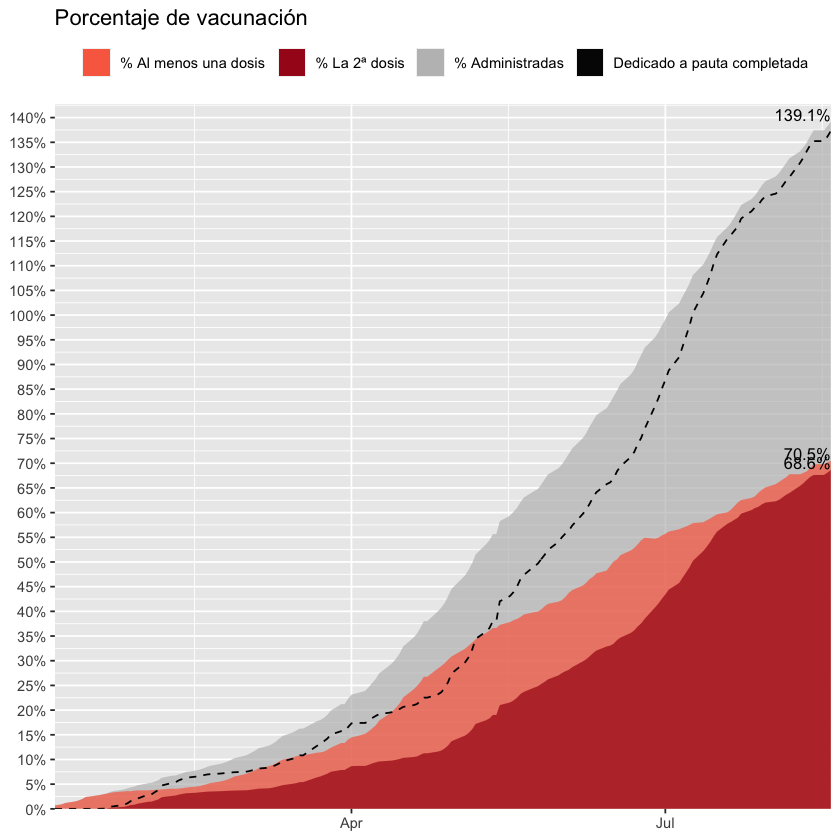

In [31]:
# Obtenemos el primer gráfico de porcentaje de vacunación
cols <- c("% Al menos una dosis"= color_ccaa [5],"% La 2ª dosis"= color_ccaa [8], "% Administradas" = "grey",
          "Dedicado a pauta completada" ="black")

fig1_1 <-
ggplot( data = vacunas)+
  geom_area(aes(x = date_pub, y = porcent_dosis, fill="% Administradas"),
            alpha =0.7) + 
  geom_area(aes(x = date_pub, y = porcent_una_dosis, fill="% Al menos una dosis"),
            alpha =0.7) + 
  geom_area(aes(x = date_pub, y = porcent_segunda_dosis, fill="% La 2ª dosis"),
            alpha =0.7) + 
  geom_line(aes(x = date_pub, y = porcent_dedicado_pauta_completa, color = "Dedicado a pauta completada"), 
            color="black",
            linetype = "dashed") +
  geom_text(data = vacunas %>%  top_n(1, date_pub),
        aes( x = date_pub, y = porcent_dosis,  
            label=paste0 (round((porcent_dosis*100),1),'%')),
        color="black",
        size =3.5,
        hjust = 1,
        vjust = -0.1) + # adjust the starting y position of the text label
  geom_text(data = vacunas %>%  top_n(1, date_pub),
        aes( x = date_pub, y = porcent_una_dosis,  
            label=paste0 (round((porcent_una_dosis*100),1),'%')),
        color="black",
        size =3.5,
        hjust = 1,
        vjust = -0.1) + # adjust the starting y position of the text label
  geom_text(data = vacunas %>%  top_n(1, date_pub),
        aes( x = date_pub, y = porcent_segunda_dosis,  
            label=paste0 (round((porcent_segunda_dosis*100),1),'%')),
        color="black",
        size =3.5,
        hjust = 1,
        vjust = -0.1) + # adjust the starting y position of the text label

  labs(title = "Porcentaje de vacunación")+
  scale_x_date( limits=c (min_date,max_date),
                          expand =  c(0,0)) + 
  scale_y_continuous(labels=scales::percent_format(accuracy = 1L),
                     expand =  c(0,0,0.015,0.015), 
                     breaks=seq(0, max(vacunas$porcent_dosis) + 0.1,
                                by = 0.05)) +
  scale_fill_manual(name ="",
                    values = cols )+

  theme(axis.title.y=element_blank(),
        axis.title.x=element_blank(),
        legend.position="top")
  plot (fig1_1)

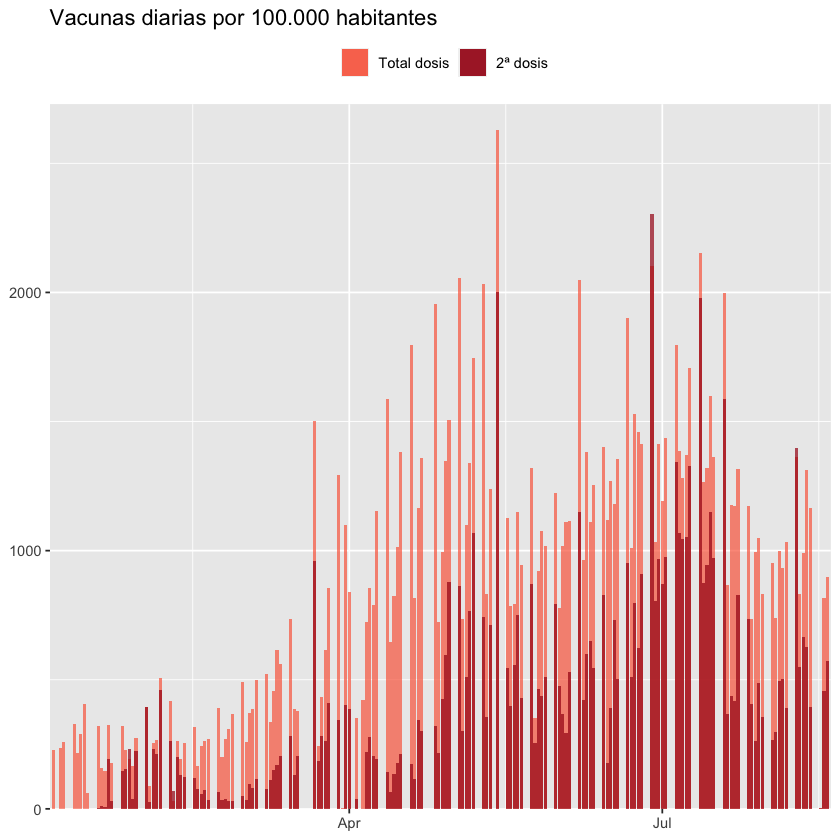

In [32]:
# Obtenemos el segundo gráfico con el número de vacunas diarias por 100000 hab
cols <- c("Total dosis"= color_ccaa [5],"2ª dosis"= color_ccaa[8])

vacunas <- arrange (vacunas,date_pub)
fig1_2 <-
ggplot()+
  geom_col(data = vacunas, 
           aes(x = date_pub, y = tasa_dosis_day, fill="Total dosis"),
           alpha =0.7) + 
  geom_col(data = vacunas,
           aes(x = date_pub, y =  tasa_second_dosis_day, fill="2ª dosis"),
           alpha =0.7) + 
  labs(title = "Vacunas diarias por 100.000 habitantes") +
  scale_x_date( limits=c (min_date-1,max_date+1),
                          expand =  c(0,0)) + 
  scale_y_continuous(expand =  c(0,0),
                    limit = c(0,max(vacunas$tasa_dosis_day) + 100),) + 
  scale_fill_manual(name = "", values = cols )+
  scale_color_manual(name = "", values = cols )+

  theme(axis.title.y=element_blank(),
        axis.title.x=element_blank(),
        legend.position="top")
  plot (fig1_2)

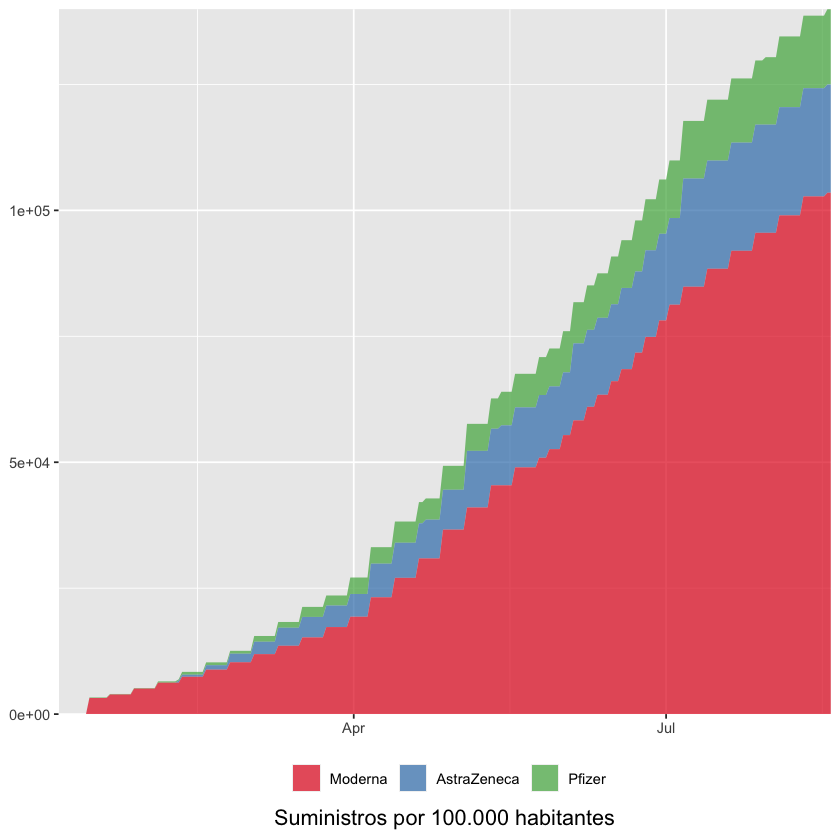

In [33]:
# Obtenemos el tercer gráfico con el tipo de vacuna suministrada
#### pivotamos los tipos de vacunas


vacunas_tipo <- pivot_longer(vacunas,
                        `Dosis entregadas Pfizer` |
                        `Dosis entregadas AstraZeneca`|
                        `Dosis entregadas Moderna`,
                         names_to="tipo_vacuna",
                         values_to="entregadas_tipo") %>%
                mutate ( tasa_entregadas_tipo = (entregadas_tipo * 100000)/poblacion) 

my_color <- brewer.pal(n = 9, name = "Set1") #paleta divergente
cols <- c("Dosis entregadas Pfizer"= my_color [1],
          "Dosis entregadas AstraZeneca"= my_color [2],
          "Dosis entregadas Moderna" = my_color [3])
orden_vacunas = c("Dosis entregadas Moderna",
                  "Dosis entregadas AstraZeneca",
                  "Dosis entregadas Pfizer")
labs <- c("Moderna",
          "AstraZeneca",
          "Pfizer")
vacunas_tipo$tipo_vacuna <- factor (vacunas_tipo$tipo_vacuna,levels=orden_vacunas)

max_date <- max(vacunas$date_pub)
min_date <- min(vacunas$date_pub)

fig2_1 <-
ggplot( data = vacunas_tipo, aes(x = date_pub))+
  geom_area(aes( y = tasa_entregadas_tipo, fill=tipo_vacuna),
            alpha =0.7) + 

  labs(caption = "Suministros por 100.000 habitantes")+
  scale_x_date( limits=c (min_date,max_date),
                          expand =  c(0,0)) + 
  scale_y_continuous(expand =  c(0,0)) + 
                     #limit = c(0,max(vacunas$tasa_entregadas_tipo) + 0.03),
                     #breaks=seq(0, max(vacunas$porcent_una_dosis) + 0.1,
                      #          by = 0.05)) +
  scale_fill_manual (name="", values = cols, 
                     label = labs
                     ) +

  theme(axis.title.y=element_blank(),
        axis.title.x=element_blank(),
        legend.position="bottom") +
  theme(plot.caption=element_text(size=13,
                                  vjust=1.25, 
                                  hjust = 0.5))
  plot (fig2_1)

In [34]:
# Vamos a obtener la tasa de vacunas entregadas por tipo de vacuna
vacunas_tipo <- pivot_longer(vacunas,
                             tasa_entregadas_AstraZeneca_day |
                             tasa_entregadas_Pfizer_day | 
                             tasa_entregadas_Moderna_day,
                             names_to = "tipo_vacuna_day",
                             values_to = "tasa_tipo_vacuna_day")
                             
 

head(vacunas_tipo)

date_pub,ccaa,Dosis entregadas Pfizer,Dosis entregadas Moderna,Dosis entregadas AstraZeneca,Dosis entregadas Janssen,Dosis entregadas,Dosis administradas,% sobre entregadas,Total 1 vacuna,⋯,porcent_segunda_dosis,second_dosis_day,dosis_day,entregadas_Pfizer_day,entregadas_AstraZeneca_day,entregadas_Moderna_day,tasa_second_dosis_day,tasa_dosis_day,tipo_vacuna_day,tasa_tipo_vacuna_day
<date>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
2021-01-05,Castilla y Leon,0,0,0,NA,51390,16430,0.3197120,NA,⋯,0,0,5502,0,0,0,0,229.7365,tasa_entregadas_AstraZeneca_day,0
2021-01-05,Castilla y Leon,0,0,0,NA,51390,16430,0.3197120,NA,⋯,0,0,5502,0,0,0,0,229.7365,tasa_entregadas_Pfizer_day,0
2021-01-05,Castilla y Leon,0,0,0,NA,51390,16430,0.3197120,NA,⋯,0,0,5502,0,0,0,0,229.7365,tasa_entregadas_Moderna_day,0
2021-01-07,Castilla y Leon,0,0,0,NA,51390,22103,0.4301031,NA,⋯,0,0,5673,0,0,0,0,236.8766,tasa_entregadas_AstraZeneca_day,0
2021-01-07,Castilla y Leon,0,0,0,NA,51390,22103,0.4301031,NA,⋯,0,0,5673,0,0,0,0,236.8766,tasa_entregadas_Pfizer_day,0
2021-01-07,Castilla y Leon,0,0,0,NA,51390,22103,0.4301031,NA,⋯,0,0,5673,0,0,0,0,236.8766,tasa_entregadas_Moderna_day,0


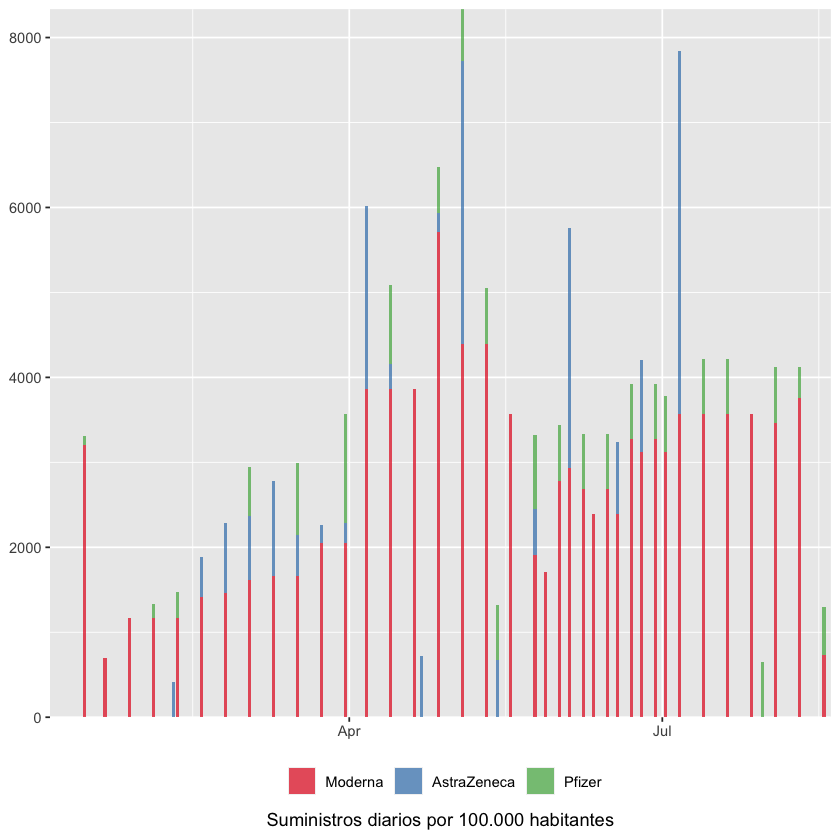

In [35]:
# Obtenemos el 4º gráfico con los suministros diarios por 100000 habitantes
cols <- c("tasa_entregadas_Pfizer_day"= my_color [1],
          "tasa_entregadas_AstraZeneca_day"= my_color [2],
          "tasa_entregadas_Moderna_day" = my_color [3])
orden_vacunas = c("tasa_entregadas_Moderna_day",
                  "tasa_entregadas_AstraZeneca_day",
                  "tasa_entregadas_Pfizer_day")
labs <- c("Moderna",
          "AstraZeneca",
          "Pfizer")
vacunas_tipo$tipo_vacuna_day <- factor (vacunas_tipo$tipo_vacuna_day,levels=orden_vacunas)
fig2_2 <-
ggplot()+
  geom_col(data = vacunas_tipo, 
           aes(x = date_pub, y = tasa_tipo_vacuna_day, fill=tipo_vacuna_day),
           position = "stack",
           alpha =0.7) + 
  labs(caption = "Suministros diarios por 100.000 habitantes") +
  scale_x_date( limits=c (min_date-1,max_date+1),
                          expand =  c(0,0)) + 
  scale_y_continuous(expand =  c(0,0)) +
  scale_fill_manual (name="", values = cols,
                     label = labs) +


  theme(axis.title.y=element_blank(),
        axis.title.x=element_blank(),
        legend.position="bottom")+
  theme(plot.caption=element_text(size=11,
                                  vjust=1.25, 
                                  hjust = 0.5))
  plot (fig2_2)